In [368]:
# basic
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
import mpl_finance as mpf
%matplotlib inline
import seaborn as sns

#time
import datetime
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta


#talib
import talib

import warnings
warnings.filterwarnings("ignore")

In [405]:
start = datetime(2019,1,1)
df_2330 = pdr.DataReader('AAPL', 'yahoo', start=start)


In [371]:
def week_data(Data):
    Data.index = pd.to_datetime(Data.index)
    period_week_data = Data.resample('W').last()
    period_week_data['Open'] = Data['Open'].resample('W').first()
    period_week_data['High'] = Data['High'].resample('W').max()
    # 最低价
    period_week_data['Low'] = Data['Low'].resample('W').min()
    # 成交量 这一周的每天成交量的和
    period_week_data['Volume'] = Data['Volume'].resample('W').sum()
    period_week_data
    #return period_week_data
    sma_50 = talib.SMA(np.array(Data['Close']), 6)
    sma_150 = talib.SMA(np.array(Data['Close']), 20)
    sma_200 = talib.SMA(np.array(Data['Close']), 52)
    
    return period_week_data


In [372]:
def month_data(Data):
    Data.index = pd.to_datetime(Data.index)
    period_week_data = Data.resample('M').last()
    period_week_data['Open'] = Data['Open'].resample('M').first()
    period_week_data['High'] = Data['High'].resample('M').max()
    # 最低价
    period_week_data['Low'] = Data['Low'].resample('M').min()
    # 成交量 这一周的每天成交量的和
    period_week_data['Volume'] = Data['Volume'].resample('M').sum()
    #return period_week_data
    sma_50 = talib.SMA(np.array(Data['Close']), 3)
    sma_150 = talib.SMA(np.array(Data['Close']), 12)
    sma_200 = talib.SMA(np.array(Data['Close']), 20)
    
    return period_week_data


In [373]:
def day_chart(Data):
    sma_50 = talib.SMA(np.array(Data['Close']), 5)
    sma_150 = talib.SMA(np.array(Data['Close']), 15)
    sma_200 = talib.SMA(np.array(Data['Close']), 20)

    fig = plt.figure(figsize=(24, 15))
    ax = fig.add_axes([0,0.2,1,0.5])
    ax2 = fig.add_axes([0,0,1,0.2])
    ax.set_xticks(range(0, len(Data.index), 10))
    ax.set_xticklabels(Data.index[::10])
    mpf.candlestick2_ochl(ax, Data['Open'], Data['Close'], Data['High'],
                      Data['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
    plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
    ax.plot(sma_50, label='50日均線')
    ax.plot(sma_150, label='150日均線')
    ax.plot(sma_200, label='200日均線')
    
    mpf.volume_overlay(ax2, Data['Open'], Data['Close'], Data['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
    ax2.set_xticks(range(0, len(Data.index), 10))
    ax2.set_xticklabels(Data.index[::10])
    
    
    H_line,M_line,L_line=talib.BBANDS(Data.Close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
    df1=pd.DataFrame(Data.Close,index=Data.index,columns=['Close'])
    df1['H_line']=H_line
    df1['M_line']=M_line
    df1['L_line']=L_line
    df1.tail()
    df1.plot(figsize=(16,6))
    ax3 = plt.gca() 
    ax3.spines['right'].set_color('none') 
    ax3.spines['top'].set_color('none')
    plt.title('BB',fontsize=15) 
    plt.xlabel('') 

    ax.legend();

In [374]:
def week_chart(Data):
    Data = week_data(Data)
    sma_50 = talib.SMA(np.array(Data['Close']), 6)
    sma_150 = talib.SMA(np.array(Data['Close']), 20)
    sma_200 = talib.SMA(np.array(Data['Close']), 52)
    fig = plt.figure(figsize=(24, 15))
    ax = fig.add_axes([0,0.2,1,0.5])
    ax2 = fig.add_axes([0,0,1,0.2])
    ax.set_xticks(range(0, len(Data.index), 10))
    ax.set_xticklabels(Data.index[::10])
    mpf.candlestick2_ochl(ax, Data['Open'], Data['Close'], Data['High'],
                      Data['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
    plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
    ax.plot(sma_50, label='6週均線')
    ax.plot(sma_150, label='20週均線')
    ax.plot(sma_200, label='52週均線')
    
    mpf.volume_overlay(ax2, Data['Open'], Data['Close'], Data['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
    ax2.set_xticks(range(0, len(Data.index), 10))
    ax2.set_xticklabels(Data.index[::10])
    
    
    H_line,M_line,L_line=talib.BBANDS(Data.Close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
    df1=pd.DataFrame(Data.Close,index=Data.index,columns=['Close'])
    df1['H_line']=H_line
    df1['M_line']=M_line
    df1['L_line']=L_line
    df1.tail()
    df1.plot(figsize=(16,6))
    ax3 = plt.gca() 
    ax3.spines['right'].set_color('none') 
    ax3.spines['top'].set_color('none')
    plt.title('BB',fontsize=15) 
    plt.xlabel('') 

    ax.legend();

In [375]:
def month_chart(Data):
    Data = month_data(Data)
    sma_50 = talib.SMA(np.array(Data['Close']), 3)
    sma_150 = talib.SMA(np.array(Data['Close']), 12)
    sma_200 = talib.SMA(np.array(Data['Close']), 20)
    fig = plt.figure(figsize=(24, 15))
    ax = fig.add_axes([0,0.2,1,0.5])
    #ax = fig.add_axes([0,0,1,0.2])
    ax2 = fig.add_axes([0,0,1,0.2])
    ax.set_xticks(range(0, len(Data.index), 10))
    ax.set_xticklabels(Data.index[::10])
    mpf.candlestick2_ochl(ax, Data['Open'], Data['Close'], Data['High'],
                      Data['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
    plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
    ax.plot(sma_50, label='3月均線')
    ax.plot(sma_150, label='12月均線')
    ax.plot(sma_200, label='20月均線')
    
    mpf.volume_overlay(ax2, Data['Open'], Data['Close'], Data['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
    ax2.set_xticks(range(0, len(Data.index), 10))
    ax2.set_xticklabels(Data.index[::10])
    
    
    H_line,M_line,L_line=talib.BBANDS(Data.Close, timeperiod=3, nbdevup=2, nbdevdn=2, matype=0)
    df1=pd.DataFrame(Data.Close,index=Data.index,columns=['Close'])
    df1['H_line']=H_line
    df1['M_line']=M_line
    df1['L_line']=L_line
    df1.tail()
    df1.plot(figsize=(16,6))
    ax3 = plt.gca() 
    ax3.spines['right'].set_color('none') 
    ax3.spines['top'].set_color('none')
    plt.title('BB',fontsize=15) 
    plt.xlabel('') 

    ax.legend();

In [376]:
def all_chart(stock):
    a = datetime.now()
    #from dateutil.relativedelta import relativedelta
    b = a - relativedelta(months=6)
    now = datetime.now()
    day_start = now - relativedelta(month =2)
    week_start = now - relativedelta(years = 2)
    month_start = now - relativedelta(years=4)
    day_stock = pdr.DataReader(stock, 'yahoo', start=b)
    week_stock = pdr.DataReader(stock, 'yahoo', start=week_start)
    month_stock = pdr.DataReader(stock, 'yahoo', start=month_start)
    day_chart(day_stock)
    week_chart(week_stock)
    month_chart(month_stock)
    

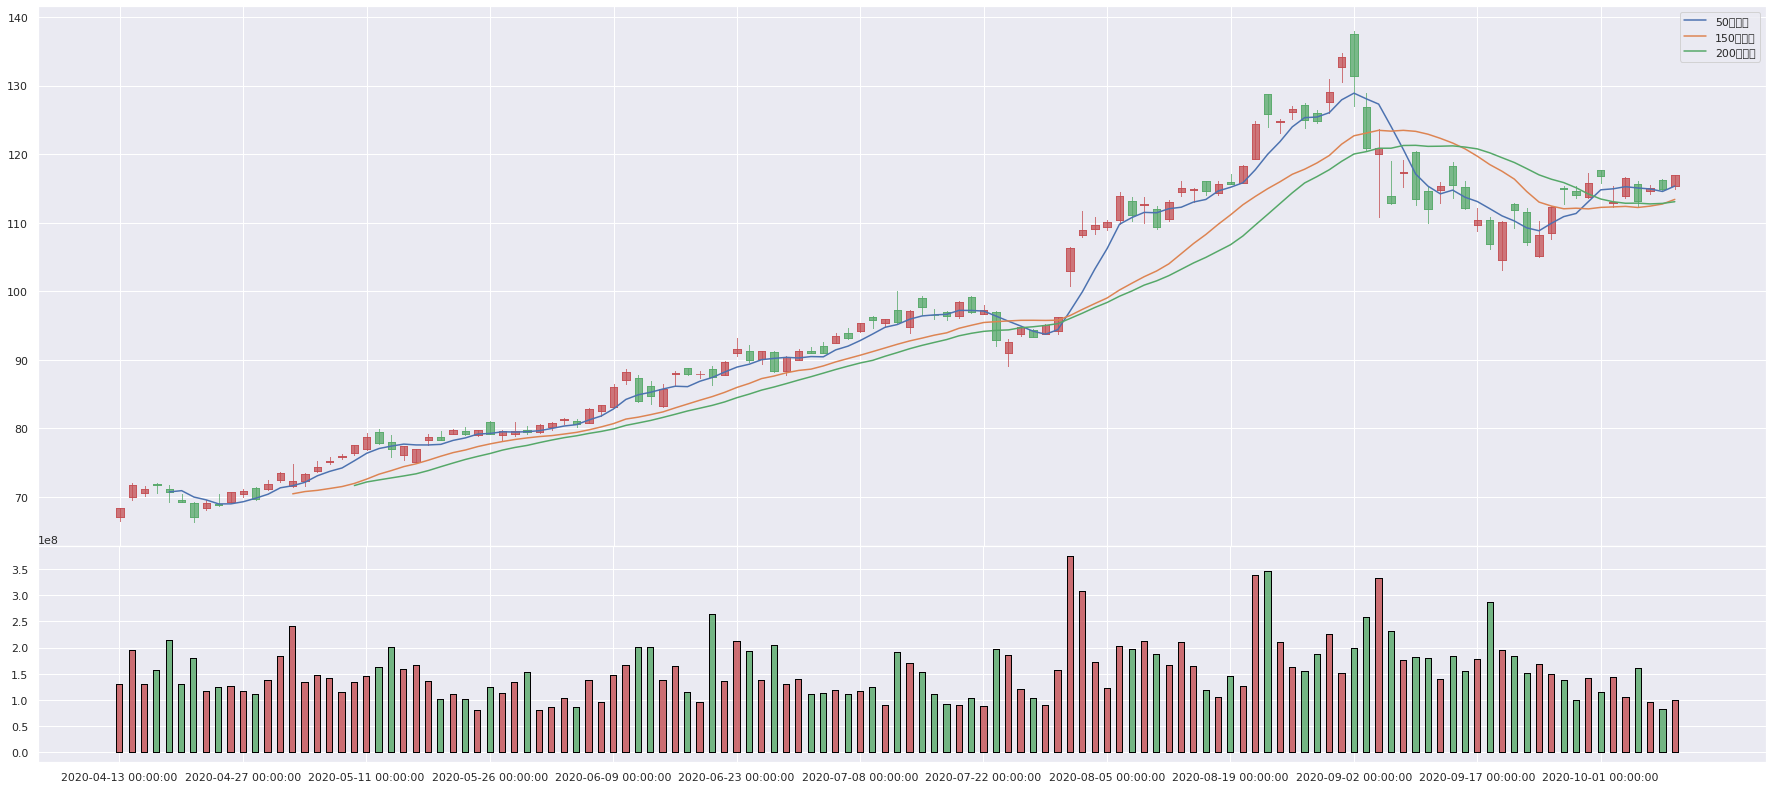

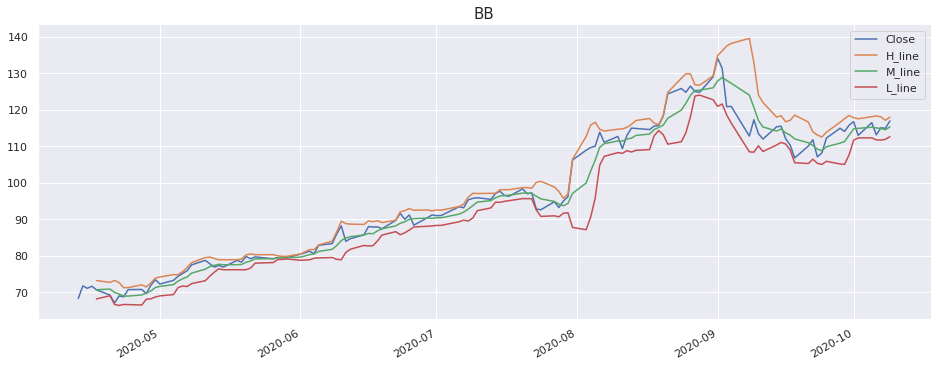

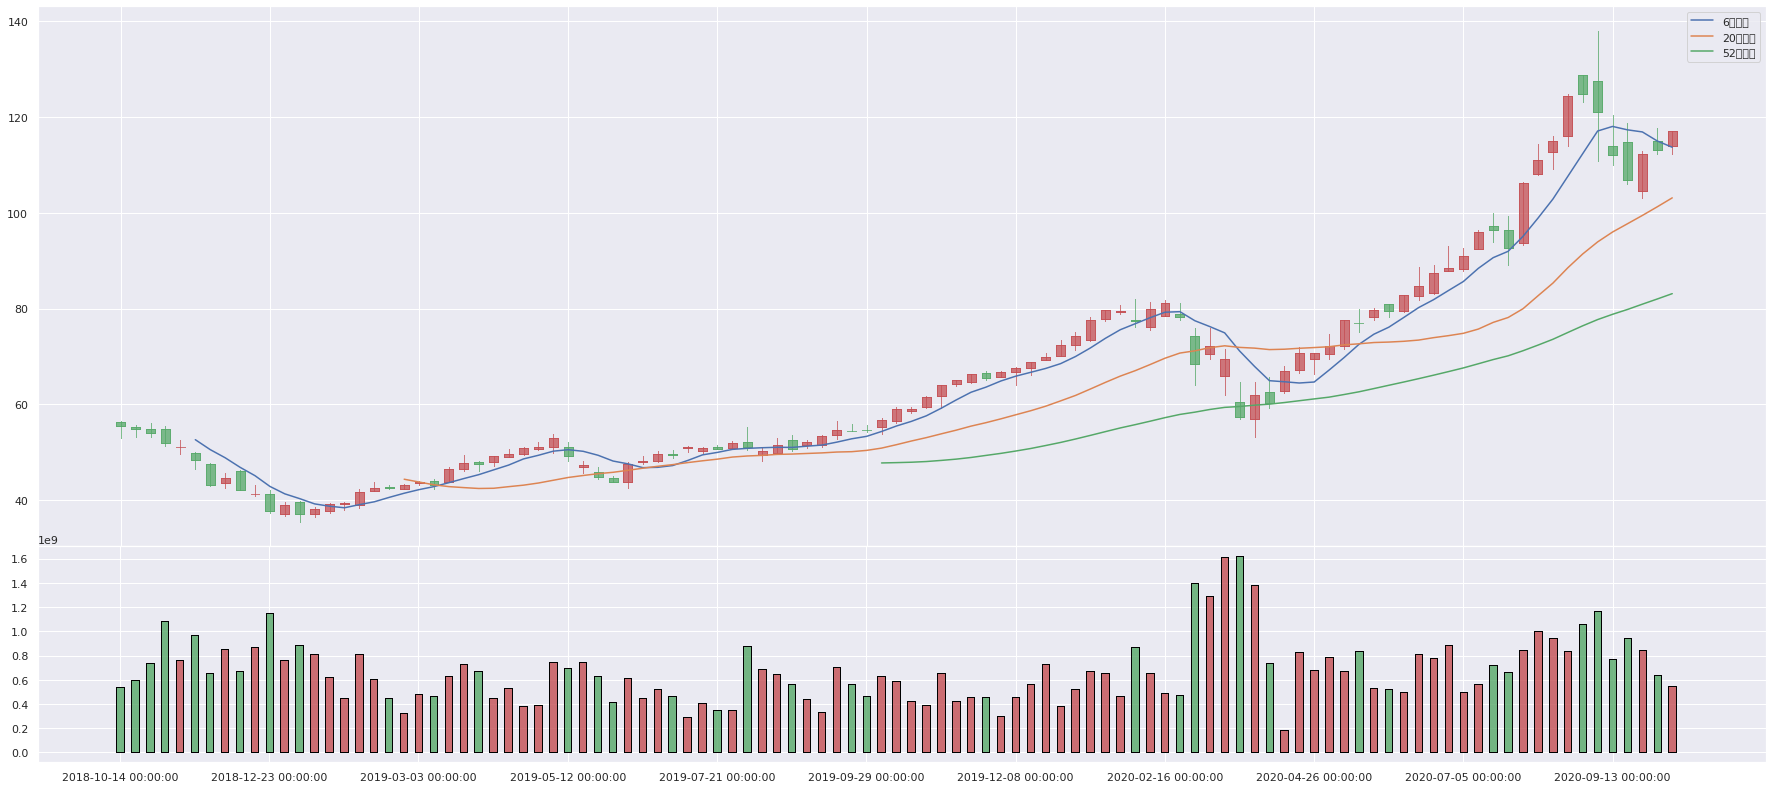

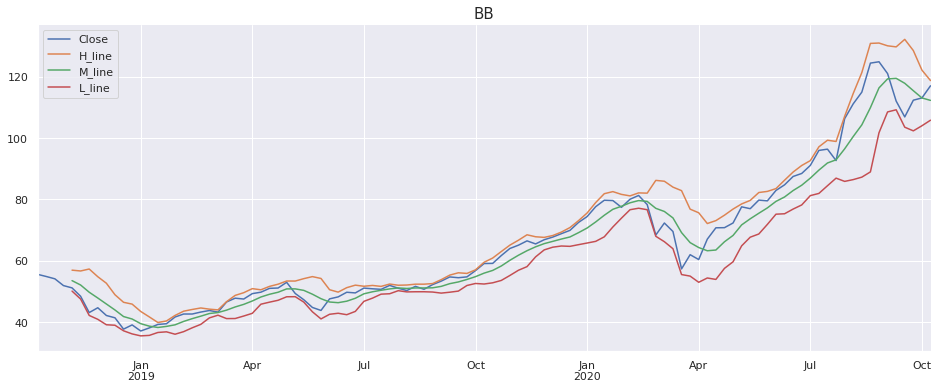

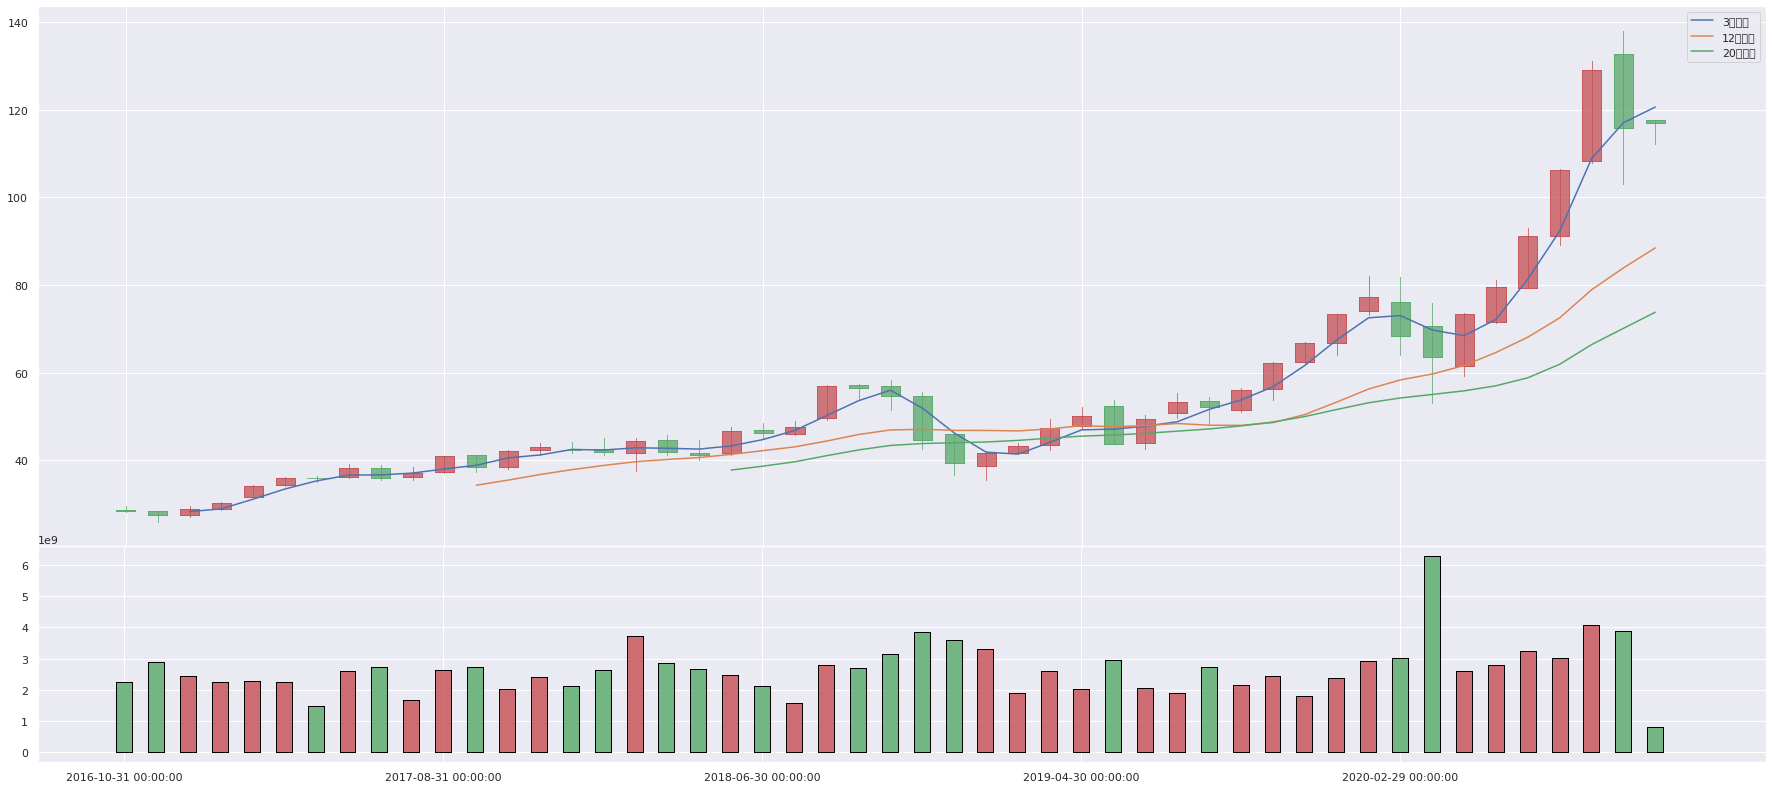

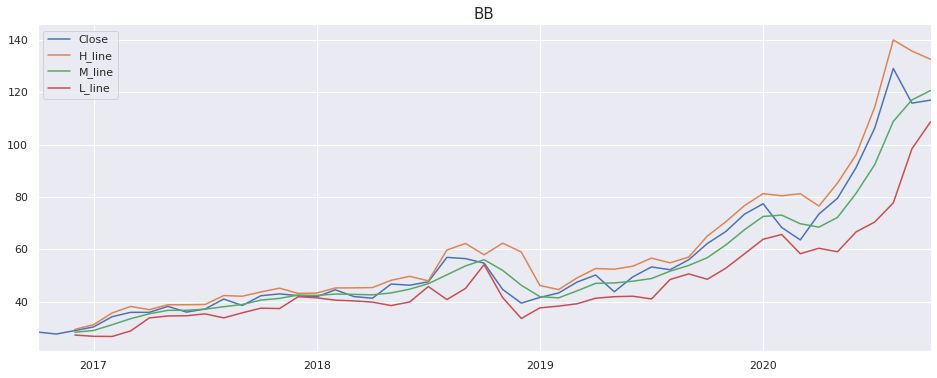

In [377]:
all_chart('AAPL')

In [378]:
#多個股票一次抓去
#start = datetime.datetime(2015,1,5)
#campany = ['2492.TW', '2330.TW', '3045.TW', '2412.TW', '2409.TW']
#df_stock = pdr.DataReader(campany, 'yahoo', start=start)

In [418]:
start = datetime(2019,1,1)
all_stock = pdr.nasdaq_trader.get_nasdaq_symbols()


TypeError: 'module' object is not callable

In [398]:
all_symbol = all_stock.index

In [401]:
type(all_symbol)

pandas.core.indexes.base.Index

In [402]:
all_symbol_list = list(all_symbol)

In [408]:
#start = datetime(2020,10,5)
#df_stock = pdr.DataReader(all_symbol_list, 'yahoo', start=start)

In [423]:
import pandas as pd
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]

In [424]:
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740.0,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800.0,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152.0,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094.0,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373.0,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061.0,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212.0,1969
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869.0,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380.0,1873
